# Multiple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Importing the dataset

In [2]:
dataset = pd.read_csv('./../datafiles/50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Apply one-hot encoding to the categorical 'State' column


In [37]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Optional: Standardize features (useful for optimization but not always necessary for linear regression)

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
print(X)

[[-7.17740563e-01 -6.85994341e-01  1.39326109e+00  2.01641149e+00
   5.60752915e-01  2.15394309e+00]
 [ 1.39326109e+00 -6.85994341e-01 -7.17740563e-01  1.95586034e+00
   1.08280658e+00  1.92360040e+00]
 [-7.17740563e-01  1.45773797e+00 -7.17740563e-01  1.75436374e+00
  -7.28257028e-01  1.62652767e+00]
 [-7.17740563e-01 -6.85994341e-01  1.39326109e+00  1.55478369e+00
  -9.63646307e-02  1.42221024e+00]
 [-7.17740563e-01  1.45773797e+00 -7.17740563e-01  1.50493720e+00
  -1.07991935e+00  1.28152771e+00]
 [-7.17740563e-01 -6.85994341e-01  1.39326109e+00  1.27980001e+00
  -7.76239071e-01  1.25421046e+00]
 [ 1.39326109e+00 -6.85994341e-01 -7.17740563e-01  1.34006641e+00
   9.32147208e-01 -6.88149930e-01]
 [-7.17740563e-01  1.45773797e+00 -7.17740563e-01  1.24505666e+00
   8.71980011e-01  9.32185978e-01]
 [-7.17740563e-01 -6.85994341e-01  1.39326109e+00  1.03036886e+00
   9.86952101e-01  8.30886909e-01]
 [ 1.39326109e+00 -6.85994341e-01 -7.17740563e-01  1.09181921e+00
  -4.56640246e-01  7.7610

## Splitting the dataset into the Training set and Test set

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training the Multiple Linear Regression model on the Training set

In [8]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

## Predicting the Test set results

In [9]:
y_pred = regressor.predict(X_test)

In [10]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.9347068473282425


Visualize the result

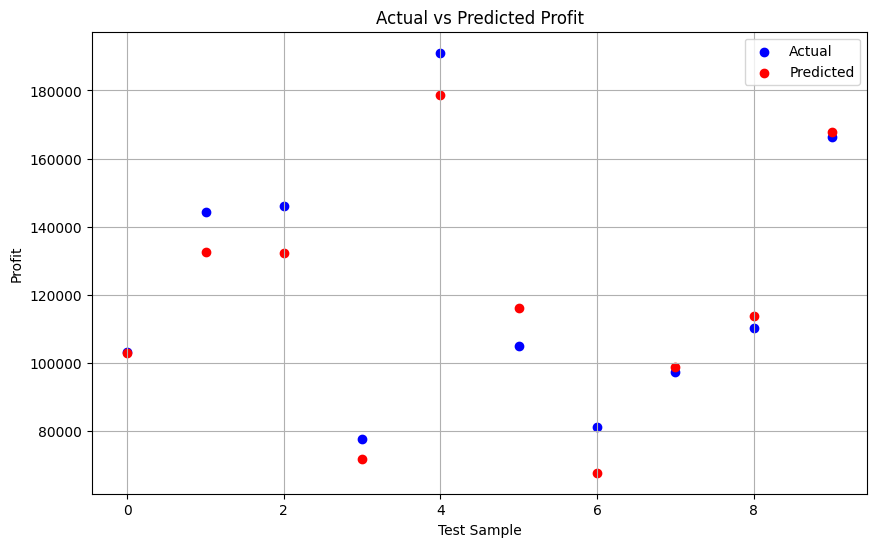

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Profit')
plt.xlabel('Test Sample')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.show()

# Show actual vs Predicted result

In [12]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

      Actual      Predicted
0  103282.38  103015.201598
1  144259.40  132582.277608
2  146121.95  132447.738452
3   77798.83   71976.098513
4  191050.39  178537.482211
5  105008.31  116161.242302
6   81229.06   67851.692097
7   97483.56   98791.733747
8  110352.25  113969.435330
9  166187.94  167921.065696


In [13]:
regressor.coef_

array([   36.8231925 ,  -411.22220992,   368.12044705, 35147.05739539,
         912.09409156,  4432.05480471])

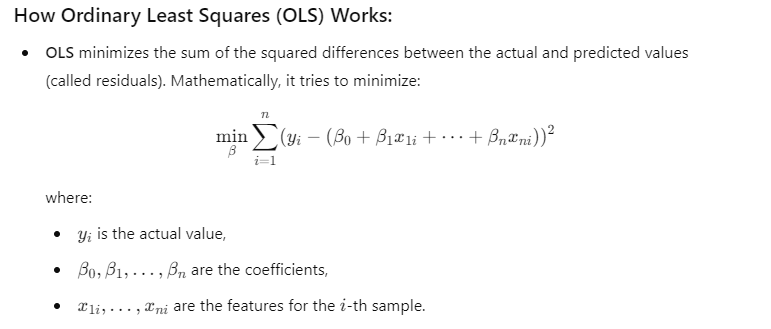

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test contains actual values and y_pred contains predicted values

# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 7514.293659640604
Mean Squared Error (MSE): 83502864.0325773
Root Mean Squared Error (RMSE): 9137.99015279494
R-squared (R²): 0.9347068473282425
